In [1]:
import tensorflow as tf
from matplotlib import pyplot
from emnist import extract_training_samples, extract_test_samples
from tensorflow.keras import *
from tensorflow.keras.layers import *
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
import sys
import os
from keras.utils.vis_utils import plot_model

sys.path.insert(1, os.path.join(sys.path[0], '../../..'))

from utils import *

%matplotlib inline
%config Completer.use_jedi = False

tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

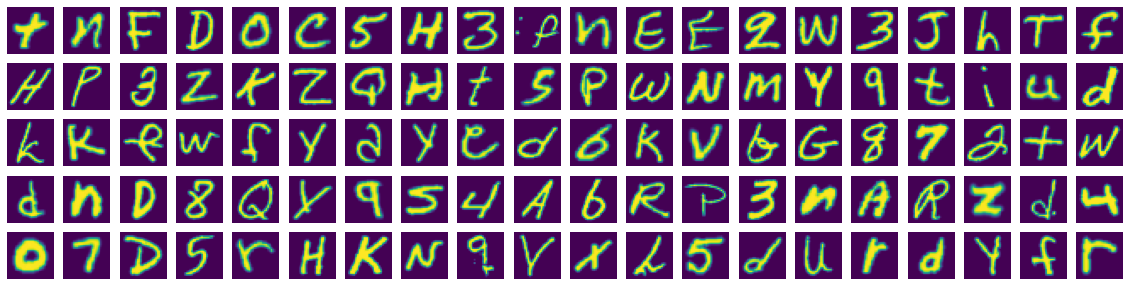

In [2]:
x_train, y_train = extract_training_samples('balanced')
x_test, y_test = extract_test_samples('balanced')

show_dataset(x_train)

In [3]:
x_train.shape

(112800, 28, 28)

In [4]:
num_classes = 47 

mean = np.mean(x_train,axis=(0, 1, 2))
std = np.std(x_train, axis=(0, 1, 2))

x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)

y_train = utils.to_categorical(y_train, num_classes) 
y_test = utils.to_categorical(y_test, num_classes) 

In [5]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [6]:
x_train.shape

(112800, 28, 28, 1)

In [7]:
def build_model(weight_decay= 0.00005, x_shape=[28,28,1], num_classes=47):
    model = Sequential()

    model.add(Conv2D(32, (3, 3), padding='same',
                         input_shape=x_shape,kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    
    model.add(Conv2D(32, (3, 3), padding='same',
                         input_shape=x_shape,kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))
    
    
    model.add(Conv2D(64, (3, 3), padding='same',
                         input_shape=x_shape,kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    
    model.add(Conv2D(64, (3, 3), padding='same',
                         input_shape=x_shape,kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))
    
    
    model.add(Conv2D(128, (3, 3), padding='same',
                         input_shape=x_shape,kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    
    model.add(Conv2D(128, (3, 3), padding='same',
                         input_shape=x_shape,kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))

   

    model.add(Flatten())
    model.add(Dense(128,kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('elu'))
    model.add(BatchNormalization())

    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    return model

In [8]:
model = build_model()

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0

In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [11]:
history = model.fit(x_train, y_train, batch_size=256, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
441/441 [==============================] - 13s 23ms/step - loss: 1.3571 - accuracy: 0.6218 - val_loss: 0.5391 - val_accuracy: 0.8287
Epoch 2/100
441/441 [==============================] - 9s 20ms/step - loss: 0.6005 - accuracy: 0.8123 - val_loss: 0.4256 - val_accuracy: 0.8651
Epoch 3/100
441/441 [==============================] - 9s 21ms/step - loss: 0.5068 - accuracy: 0.8400 - val_loss: 0.3921 - val_accuracy: 0.8748
Epoch 4/100
441/441 [==============================] - 9s 21ms/step - loss: 0.4645 - accuracy: 0.8526 - val_loss: 0.3807 - val_accuracy: 0.8803
Epoch 5/100
441/441 [==============================] - 9s 20ms/step - loss: 0.4399 - accuracy: 0.8605 - val_loss: 0.3791 - val_accuracy: 0.8819
Epoch 6/100
441/441 [==============================] - 9s 20ms/step - loss: 0.4252 - accuracy: 0.8656 - val_loss: 0.3636 - val_accuracy: 0.8884
Epoch 7/100
441/441 [==============================] - 9s 21ms/step - loss: 0.4130 - accuracy: 0.8708 - val_loss: 0.3667 - val_accuracy

441/441 [==============================] - 10s 22ms/step - loss: 0.3519 - accuracy: 0.8996 - val_loss: 0.3654 - val_accuracy: 0.9008
Epoch 58/100
441/441 [==============================] - 10s 22ms/step - loss: 0.3522 - accuracy: 0.8991 - val_loss: 0.3670 - val_accuracy: 0.9014
Epoch 59/100
441/441 [==============================] - 10s 22ms/step - loss: 0.3528 - accuracy: 0.9005 - val_loss: 0.3709 - val_accuracy: 0.9008
Epoch 60/100
441/441 [==============================] - 10s 22ms/step - loss: 0.3509 - accuracy: 0.8995 - val_loss: 0.3799 - val_accuracy: 0.9004
Epoch 61/100
441/441 [==============================] - 10s 22ms/step - loss: 0.3511 - accuracy: 0.8996 - val_loss: 0.3766 - val_accuracy: 0.8996
Epoch 62/100
441/441 [==============================] - 10s 22ms/step - loss: 0.3512 - accuracy: 0.8996 - val_loss: 0.3741 - val_accuracy: 0.8997
Epoch 63/100
441/441 [==============================] - 10s 22ms/step - loss: 0.3497 - accuracy: 0.8994 - val_loss: 0.3757 - val_accuracy

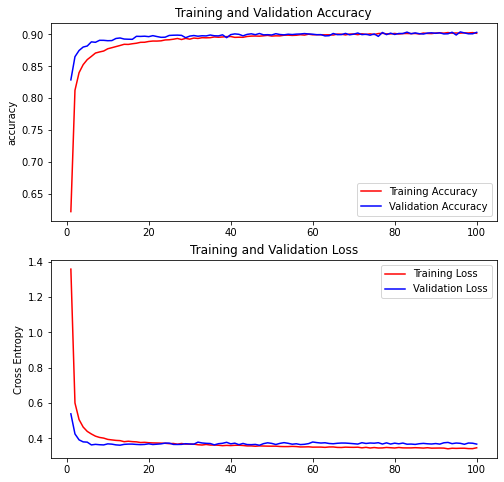

In [12]:
print_history_chart(history)

In [13]:
pprint(full_evaluate(model, x_test, y_test))

{'accuracy_score': 0.9033510638297872,
 'f1_score_macro': 0.9025199833787635,
 'f1_score_weighted': 0.9041821442808109}


In [15]:
model.save('vanilla_emnist.h5')

In [16]:
model = tf.keras.models.load_model("vanilla_emnist.h5")

In [17]:
pprint(full_evaluate(model, x_test, y_test))

{'accuracy_score': 0.9033510638297872,
 'f1_score_macro': 0.9025199833787635,
 'f1_score_weighted': 0.9041821442808109}


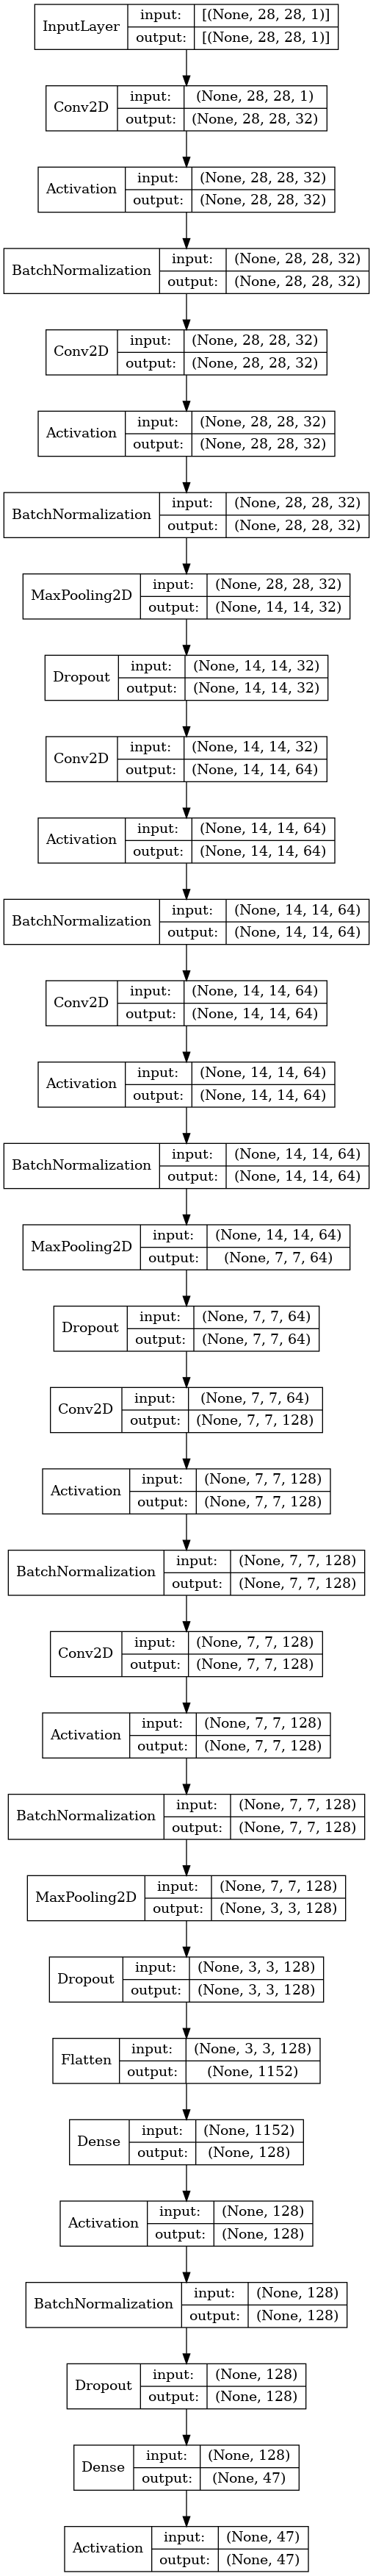

In [18]:
plot_model(model, show_shapes=True, show_layer_names=False)